# Bayes 公式

给定两个随机变量 $X, Y$ 的联合概率：$p(x, y)$， 归一性关系 $\sum\limits_{x,y}p(x,y)=1$

偏概率：$p_X(x)\equiv\sum\limits_{y}p(x,y),\;p_Y(y)\equiv\sum\limits_{x}p(x,y)\qquad$ (即$p_X$定义为将样本集$(X, Y)$中所有满足 $X=x$ 的成员的概率值求和), 归一性关系 $\sum\limits_{x}p_X(x) = 1$

条件概率：$p(x|y)\equiv {p(x,y)\over p_Y(y)}$, 归一性关系 $\sum\limits_{x}p(x|y) = 1$

根据上述定义，显然有 $$p(y|x)={p(x|y)p_Y(y)\over p_X(x)}\equiv{p(x|y)p_Y(y)\over \sum\limits_{y^\prime}p(x|y^\prime)p_Y(y^\prime)}$$

$$\text{postior}={\text{conditional prob}\times \text{prior}\over \text{evidence}}$$

该公式称为“Bayes”公式，Bayes公式从上述定义的角度来说是“平庸”的，但其意义在于对条件概率概念的“解释”和应用

根据Bayes公式，显然有如下<strong>Chain Rule</strong>：

$$p(x_1,x_2,\dots,x_n)=p(x_1)p(x_2|x_1)p(x_3|x_1,x_2)\dots p(x_n|x_1,x_2,\dots,x_{n-1})$$



“机器学习”实际的算法模型中，由于概率密度函数一般会涉及大量的模型参数（latent variables），为简化计算，我们一般会基于一些合理假设认为，整体概率函数可以分解为若干因子的乘积（每个因子只依赖少量参数），这种乘积可以认为是对 Bayes chain rule 的简化，并可以用directional graph来的描述，例如：
![graphic_distribution.png](./graphic_distribution.png)
其对应关系是：
$$p(a,b,c,d,e)=p(a)p(b|a)p(c|a,b)p(d|b)p(e|c)$$

# 熵

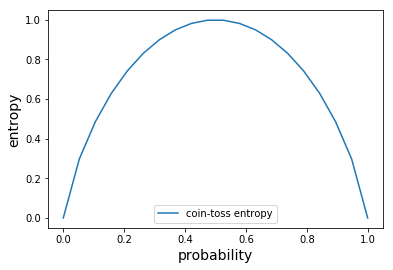

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

pp = np.linspace(0.000001,1-0.0000001, 20)
ss = -pp*np.log2(pp) - (1-pp)*np.log2(1-pp)
plt.plot(pp, ss, label="coin-toss entropy")
plt.xlabel("probability", fontsize=14)
plt.ylabel("entropy", fontsize=14)
plt.legend()
plt.show()

# “自然”随机分布


### 二项式分布(Binominal Distribution)

掷硬币$N$次，硬币面朝上的几率为$\theta$，则硬币面朝上出现次数为$n$的几率为：
$$P_n = C_N^n\theta^n(1-\theta)^{N-n}$$ 称为"二项式分布"，记作<span style="color:red">$Binominal(N, \theta)$</span>，（$n$ 的峰值大致位于 $N\theta$ 处）

### 多项式分布(Multinominal Distribution)

是二项式分布的高维推广：

掷一个有$k$个面的骰子$N$次，骰子面i的几率为$\theta_i$，各骰子面i分别出现的次数为$\{n_i\}$，显然 $\sum \theta_i=1,\;\sum n_i=N$，这种结果出现的几率为：
$$P_{n_1,\dots n_k} = {N!\over n_1!\dots n_k!}\theta_1^{n_1}\dots\theta_k^{n_k}$$
 
称为"多项式分布"，记作<span style="color:red">$Multinominal(N, \theta_1,\dots,\theta_k)$</span> 

### 泊松分布（Poisson Distribution）

是二项式分布的“参数连续化”：

类似于 *“全球平均每小时出生3000个小孩”* 的现象，有以下特点：

1. 单个事件在自然界任意时刻的发生概率很低 （某时刻诞生*“一个小孩的概率”*远低于*“没有诞生一个小孩”*的概率）
2. 某段时间内事件发生的次数，与且仅与这段时间的长短成正比 （全球平均每小时出生3000个，那么平均每2小时出生6000个）

不妨假设，将某段时间等距划分为N个dt的时段，上帝通过“掷硬币”来决定是否在每个时段内诞生一个孩子（诞生的概率为p），显然由于特点（1），可以假设 $N\rightarrow\infty, p\rightarrow0$, 这段时间内出生k个孩子的概率为二项式分布(Binorminal Distribution)：
$$P_k = C_N^kp^k(1-p)^{N-k}$$

这段时间内出生孩子个数k的期望值为：$\langle k \rangle = pN$, 由于特点（2），可以假设该期望值仅和这段时间的长短成正比，即 $\langle k \rangle ＝ pN = \lambda t$, 其中 $t$ 表示时段的长短，$\lambda$ 是比例常数，即 
$$\text{在 }N\rightarrow \infty, p\rightarrow0, pN = \lambda t\text{ 的条件下，求 } P_k = C_N^kp^k(1-p)^{N-k}\text{ 的极限}$$，可以证明：

$$P_k = C_N^kp^k(1-p)^{N-k} \xrightarrow{p\rightarrow0,\;pN=\lambda t} P_k={(\lambda t)^ke^{-\lambda t}\over k!}\text{ (Poisson 分布)}$$

其中 $\xi\equiv\lambda t$ 是一个和时段长短相关的无量纲参数，并满足归一性：$\sum\limits_{k=0}^{\infty}P_k = 1$, “泊松分布”记为<span style="color:red">$Poisson(\xi)$</span>，（$k$ 的峰值大致位于 $\xi$ 处）

类似于放射元素辐射的现象也和Poisson分布有密切关系，$1/\lambda$ 衡量 “半衰期”

### 正态分布（Norminal Distribution）

连续随机变量$X\in(-\infty, +\infty)$, 概率密度函数若满足 $$f(x)={1\over \sigma\sqrt{2\pi}}\exp^{-{(x-\mu)^2\over 2\sigma^2}}$$, 则称为“正态分布”，记为<span style="color:red">$Norminal(\mu,\sigma)$</span> 


相关定理：

二项式分布 $P_n = C_N^n\theta^n(1-\theta)^{N-n}$，当 $n\theta\gg1,\;n(1-\theta)\gg1$ 时, $$Binominal(N,\theta)\xrightarrow{n\theta\gg1,\;n(1-\theta)\gg1} Norminal\left(\mu=n\theta,\sigma=\sqrt{n\theta(1-\theta)}\right)$$

Poisson 分布 $P_k={\xi^ke^{-\xi}\over k!}$, 当 $k\gg1$ 时，
$$Poisson(\xi) \xrightarrow{k\gg1}Norminal\left(\mu=\xi,\sigma=\sqrt{\xi}\right) $$

**中心极限定理**：大量统计独立的随机变量的平均值的分布趋于正态分布

# 其它随机分布（一般是具有良好性质的“人工”函数，用于参数拟合等）

### beta 分布

对于连续随机变量$\Theta\in[0, 1]$，具有如下形式的概率密度函数： 
$$Beta(\theta|a, b)\equiv{\theta^{a-1}(1-\theta)^{b-1}\over B(a,b)},\qquad\text{ 其中 }a>0,b>0,\theta\in[0,1]$$
称为“beta分布”，其中 归一化因子 $B(a,b)\equiv\Gamma(a)\Gamma(b)/\Gamma(a+b)$，以确保 $\int_0^1{\rm d}\theta Beta(\theta|a,b)=1$

$a,b>1$时，$Beta(\theta|a, b)$ 是“钟形”曲线，峰值位于 $(a-1)/(a+b-2)$，事实上，对于 分布$Beta(\theta|a, b)$，
$$\text{平均值：}E(\theta)={a\over a+b}\text{,   平方差：}\sigma_\theta^2={ab\over(a+b)^2(a+b+1)}$$

### Dirichelet 分布

是beta 分布的高维推广：

假设K维随机变量 $\{\theta_1,\theta_2,\dots,\theta_K\}$，满足 $0\le\theta_i\le1$ 且 $\sum\limits_i\theta_i=1$, 具有如下形式的概率密度函数：
$$Dir(\theta_1,\dots,\theta_K|\alpha_1,\dots,\alpha_K)\equiv{1\over B(\alpha_1,\dots,\alpha_K)}\prod\limits_{i=1}^K\theta_i^{\alpha_i-1},\qquad\text{ 其中所有} \alpha_i>0$$

### beta分布 作为二项式分布的conjugate prior

问题：试验掷硬币5次，出现3次硬币面朝上，对面朝上几率$\theta$“最合理的”猜测值应该是多少？

思路：由于此时$\theta$ 是一个未知的待估值，可以认为$\theta$满足某种概率分布，所谓“最合理的”猜测值，即求在某种条件概率下的期望值问题

详解：掷硬币5次，所有可能出现的相关事件集为$\{I_0, I_1, I_2, I_3, I_4, I_5\}$, 其中$I_i$ 表示“出现i次面朝上”的事件。由于试验结果为$I_3$, 因此相关的条件概率为 $p(\theta|I_3)$, 根据Bayes公式，有：
$$p(\theta|I_3)\propto{p(I_3|\theta)p(\theta)}, \text{ 其中 } p(I_3|\theta) = C_5^3\theta^3(1-\theta)^2 \text{ 是二项式分布}$$

其中$p(\theta)$ 称为$\theta$的“先验分布”（prior），由于我们对$\theta$"没有任何信息量"，因此认为 $p(\theta)=1$，即是$[0,1]$上的均匀分布, 于是

$$$p(\theta|I_3)\propto \theta^3(1-\theta)^2 \sim Beta(\theta|4,3)$$

$Beta(\theta|4,3)$ 的峰值在$\theta_{\rm peak}=3/5=0.6$，平均值$E(\theta)=4/7 \approx0.57$, 因此 0.57或0.6都是某种意义上的合理猜测值

若我们根据某些信息用beta分布来描述 $p(\theta)$，即$$p(\theta)=Beta(\theta|a,b)\equiv\theta^{a-1}(1-\theta)^{b-1}/B(a,b)$$, 则

$$p(\theta|I_3)\propto{p(I_3|\theta)p(\theta)} \propto \theta^{a+3-1}(1-\theta)^{b+2-1}\sim Beta(\theta|a+3,b+2)$$

(注意到：当$a=b=1$时，$Beta(\theta|a+3,b+2)$ 还原到 $Beta(\theta|4,3)$的结果)

对比观察 posterior 概率 $p(\theta|I_3)$ 和 $p(\theta)$ 都满足beta函数的形式，正是因为在Bayes公式中的这种前后一致性，我们称beta分布是二项式分布的"conjugate prior"

### Dirichelet分布 作为多项式分布的conjugate prior


t-distribution

t-SNE: t-distributed stochastic neighbor embedding

It is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points
